In [1]:
from CATH_parser import *
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Guidelines for the Standardisation of InterPro Entry Names and Short Names:

## Long Names

### Must be no more than 100 characters

### Must be unique

### Must start with upper case (unless initial term represents an accepted and common abbreviation, e.g. tRNA, rRNA, cAMP)

* Only capitalise proper nouns within the name (e.g. Gram)

* Gene product abbreviations, the first and last letter should be capitalised: AbcA; this is irrespective of the genome nomenclature standards for individual organisms.

#### Can contain the following grammatical symbols:

* Slash - / represents 'or' or 'and', e.g. subunits B/E, alpha/beta, 1/2

* Prime - ' and brackets: (),[] can be used in enzyme or chemical terms

* Hyphen, can be used as a modifier, e.g. Abc1-like, archaeal-like

#### Must not contain the following grammatical symbols:

* underscore

* dash

* mathematical symbols +, -, *, \

* colon

* semi-colon

#### Must not contains the following words:

* plurals e.g. proteins, subunits

* with

* within

* on

* an

* to

* in

* involved

* protein - unless it is specifically part of the Name e.g. Uncharacterised conserved protein (UCP), Vacuolar protein sorting (Vps)

* CONJUNCTIONS: for, and, nor, but, or, so

#### Avoid referring to the following, unless this is accurate representation of the protein family name:

* organs

* tissue types

* cell types

#### Generally avoid the use of the following terms:

* precursor

* homolog

* paralog

* ortholog

* gene

#### Positional restraints; names should not begin with:

* Predicted

* Probable

* Putative

#### Modifiers

* type

* related,

* associated

#### These should ONLY be used with a hyphen, attached to the term they are intended to modify, e.g. bacterial-type, Abc1-related, Vps21-associated.

##### Avoid acronyms and abbreviations in names wherever possible

* Exceptions are the use of abbreviations used for protein COMPLEXs, for example:

* DASH complex, subunit Spc19

* MRN complex, subunit Mre11

### Name structure

#### Order the name with the most general classification first, going to the most specific, with taxonomy at the end (taxonomy to be added only if necessary to distinguish one entry from another):

* STEM (class/family/protein name), SUBDIVISION (type, subunit, example gene-product name), POSITION (C/N-terminal), TAXONOMY

* Use the terms site, domain, family and superfamily where these names accurately describe the biology (e.g. SH2 domain describes a known domain)

* Separate parts of names using commas

* Regarding, taxonomy, this should only be used if it is necessary to specify a particular lineage. For example:

* RNA polymerase alpha subunit, C-terminal, archaea

* Phosphoenolpyruvate carboxylase, archaeal-type

* Phosphoenolpyruvate carboxylase, bacterial/plant-type

#### Name conventions for uncharacterised families/domains:

* Protein/Domain of unknown function DUFnnnnn = Pfam (note n= numeric character)

* DUF numbering is provided by Pfam

* Uncharacterised conserved protein UCPnnnnnn = PIRSF

* UCPnnnnnn, numbering is taken from the method accession (PIRSF006287 = UCP006287). Either provided by PIR or added by InterPro where applicable.

* Conserved hypothetical protein CHPnnnnn = TIGRFAMs

* CHPnnnnn, numbering is taken from the method accession (TIGR01620 = CHP01620). Either provided by TIGR or added by InterPro where applicable.

* Uncharacterised protein family UPFnnnn = Swiss-Prot

* UPFnnnn, numbering is provide Swiss-Prot.

* also used by Pfam when they model Swiss-Prot families.

* Where a set of UPF Swiss-Prot entries are deemed to be representative of the InterPro entry the Swiss-Prot naming convention will be used in preference to the member database convention for families of unknown function.

* Uncharacterised protein family <text>, <modifier> = InterPro

* Uncharacterised_<text/modifier>

* For use where a member database family does not use its own format for an entry where the contents have no known function.

In [14]:
!wget ftp://orengoftp.biochem.ucl.ac.uk/cath/releases/latest-release/cath-classification-data/cath-superfamily-list.txt

--2018-07-10 12:37:13--  ftp://orengoftp.biochem.ucl.ac.uk/cath/releases/latest-release/cath-classification-data/cath-superfamily-list.txt
           => ‘cath-superfamily-list.txt’
Resolving orengoftp.biochem.ucl.ac.uk (orengoftp.biochem.ucl.ac.uk)... 128.40.46.87
Connecting to orengoftp.biochem.ucl.ac.uk (orengoftp.biochem.ucl.ac.uk)|128.40.46.87|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /cath/releases/latest-release/cath-classification-data ... done.
==> SIZE cath-superfamily-list.txt ... 185936
==> PASV ... done.    ==> RETR cath-superfamily-list.txt ... done.
Length: 185936 (182K) (unauthoritative)

cath-superfamily-li 100%[===================>] 181.58K  --.-KB/s    in 0.03s   

2018-07-10 12:37:13 (6.46 MB/s) - ‘cath-superfamily-list.txt’ saved [185936]



In [17]:
df = pd.read_csv("./cath-superfamily-list.txt", sep='\t',index_col=0, header=0)
df = df.dropna()
df['COMMENT'] = np.nan
D = DataFrame_parser(df)

In [18]:
D.implement_replacements().dropna().to_csv('./results/renamed_superfamilies.tsv', sep='\t')
D.implement_duplicates().to_csv('./results/duplicates.tsv', sep='\t')
D.compile_flags().dropna().to_csv('./results/flagged.tsv', sep='\t')

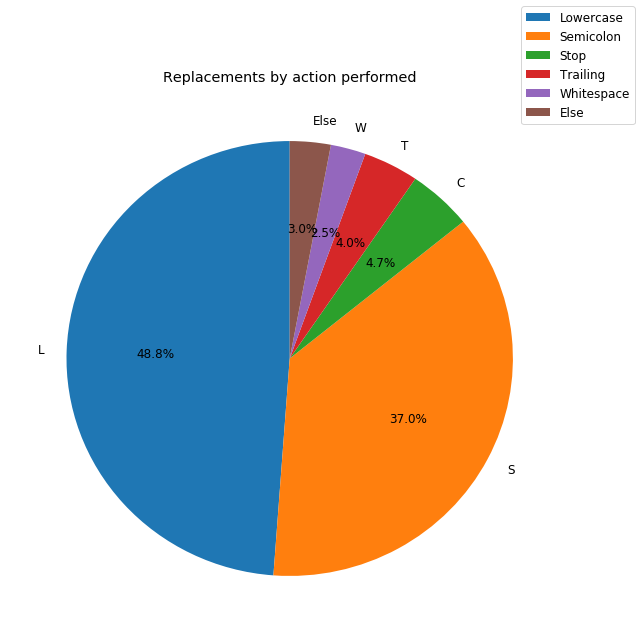

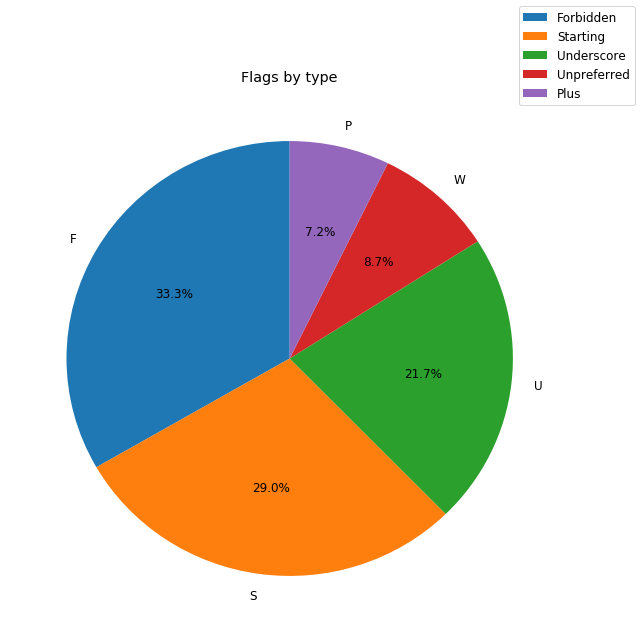

In [20]:
repl_labels = {"L":"Lowercase", 
               "S": 'Semicolon', 
               "C":'Stop', 
               "T":'Trailing', 
               "W": 'Whitespace', 
               'Else':'Else'}
flag_labels = {"F":"Forbidden", 
               "S":'Starting', 
               "U":'Underscore', 
               "W":'Unpreferred', 
               "P":'Plus',
              "Else":"Else"}

plot_pie(D.implement_replacements(), 
         savedname='./plots/replacement.png', 
         title='Replacements by action performed', 
         legend=repl_labels)
plot_pie(D.compile_flags(),
        savedname='./plots/flags.png',
        title='Flags by type',
        legend=flag_labels)